[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]()

# Introducción a [Keras](https://keras.io)

Keras es una API de aprendizaje profundo de alto nivel que permite construir, entrenar, evaluar y ejecutar fácilmente todo tipo de redes neuronales. Su documentación (o especificación) está disponible en https://keras.io.

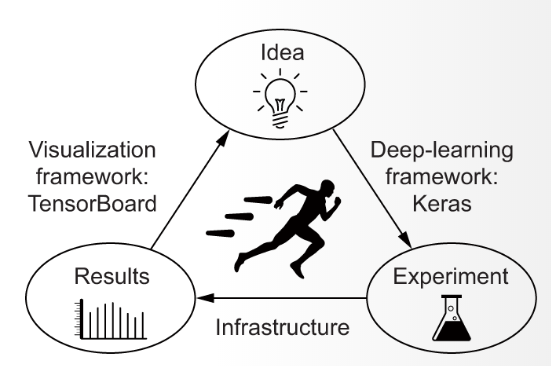

Para realizar los cálculos requeridos por las redes neuronales, el equipo Keras se basa en un backend de cálculo. En la actualidad, puede elegir entre tres populares bibliotecas de código abierto de aprendizaje profundo: **TensorFlow**, Microsoft Cognitive Toolkit (CNTK) o Theano. TensorFlow ahora viene empaquetado con su propia implementación Keras llamada tf.keras.

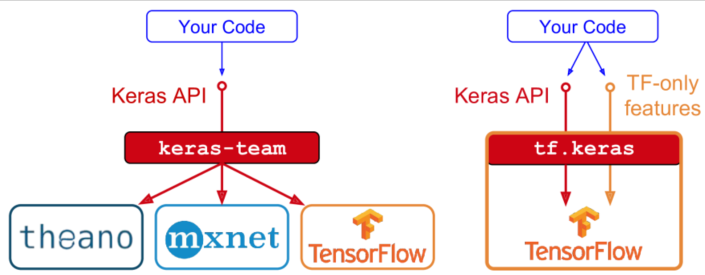




# Keras Model Life-Cycle
A continuación se presenta una visión general de los 5 pasos del ciclo de vida del modelo de red neuronal en Keras:

* Definir Grafo - Arquitectura.
* Compilar red.
* Entrenar la red.
* Evaluar la red.
* Hacer predicciones.

## Paso 1: Definir la Arquitectura de la Red
El primer paso es definir su red neuronal. Las redes neuronales se definen en Keras como una secuencia de capas. El contenedor para estas capas es la clase **Sequencial**. 

El primer paso es crear una instancia de la **clase Sequential**. Luego se pueden crear las capas y añadirlas en el orden en que deberían estar conectadas. 

Por ejemplo, se puede realizar en dos pasos:

```
model = Sequential()
model.add(Dense(2))
```
Pero también es posible hacer esto en un solo paso creando una matriz de capas y pasándosela al constructor de la clase Sequential.

```
layers = [Dense(2)]
model = Sequential(layers)
```

La primera capa de la red debe definir el número de entradas a esperar. La forma en que se especifica esto puede diferir dependiendo del tipo de red, pero para un modelo de Perceptron multicapa esto se especifica mediante el atributo **input_dim**. Por ejemplo, un pequeño modelo de Perceptron multicapa con 2 entradas en la capa visible, 5 neuronas en la capa oculta y una neurona en la capa de salida se puede definir como:

```
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Dense(1))
```

La estructura en un modelo secuencial permite tratar de manera individual cada una de las capas de la red. Por ejemplo, las funciones de activación que transforman una señal sumada de cada neurona en una capa, pueden ser extraídas y añadidas a la **Sequencial** como un objeto similar a una capa llamado la clase **Activation**.

```
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
```
o 

```
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```

La elección de la función de activación es más importante para la capa de salida, ya que definirá el formato que tendrán las predicciones. Por ejemplo, a continuación se muestran algunos tipos de problemas comunes de modelado predictivo y la estructura y función de activación estándar que se pueden utilizar en la capa de salida:

* **Regresión**: Función de activación lineal, o linear, y el número de neuronas que coinciden con el número de salidas.

* **Clasificación binaria (2 clases)**: Función de activación logística, o sigmoide, y una neurona en la capa de salida.

* **Clasificación multiclase (>2 clase)**: Función de activación Softmax, o softmax, y una neurona de salida por valor de clase, asumiendo un patrón de salida con codificado en caliente (hot enconding).

## Paso 2. Compilar Red

Una vez definida la red, se procede a compilarla. En este paso se transforma la  secuencia de capas definidas en una serie de matrices altamente eficientes en un formato destinado a ser ejecutado en su GPU o CPU, dependiendo de cómo esté configurado Keras. Piense en la compilación como un paso previo al cálculo para la red. Siempre es necesario después de definir un modelo.

La compilación requiere que se especifiquen una serie de parámetros, adaptados específicamente a la formación de la red. Específicamente, el **algoritmo de optimización** a utilizar para entrenar la red y la función de pérdida utilizada para evaluar la red que es minimizada por el algoritmo de optimización. 

Por ejemplo, a continuación se presenta un caso de compilación de un modelo definido y especificación del algoritmo de optimización de **descenso de gradiente estocástico (sgd)** y la función de pérdida de **error medio cuadrado (mean_squared_error)**, destinado a un problema de tipo regresivo.

```
model.compile(optimizer='sgd', loss='mean_squared_error')
```
Alternativamente, el optimizador puede ser creado y configurado antes de ser proporcionado como argumento para el paso de compilación.

```
algorithm = SGD(lr=0.1, momentum=0.3)
model.compile(optimizer=algorithm, loss='mean_squared_error')
```

El tipo de problema de modelado predictivo impone restricciones al tipo de función de pérdida que se puede utilizar. Por ejemplo, a continuación se presentan algunas funciones de pérdida estándar para diferentes tipos de modelos predictivos:

* **Regresión**: Mean Squared Error o mean_squared_error.
* **Clasificación binaria (2 clases)**: Pérdida Logarítmica, también llamada entropía cruzada o binario_crossentropía.
* **Clasificación multiclase (>2 clase)**: Pérdida logarítmica multiclase o cruces_clásicos.

El algoritmo de optimización más común es el **descenso de gradiente estocástico**, pero Keras también soporta un conjunto de otros algoritmos de optimización de última generación que funcionan bien con poca o ninguna configuración. Tal vez los algoritmos de optimización más utilizados debido a su mejor rendimiento en general son:

* **Descenso de Gradiente Estocástico**, o **[sgd](https://keras.io/api/optimizers/sgd/)**, que requiere la configuración de una tasa de aprendizaje e impulso.

* **Adam, o [Adam](https://keras.io/api/optimizers/adam/)**, requiere la configuración de la tasa de aprendizaje.

* **[RMSprop](https://keras.io/api/optimizers/rmsprop/), o rmsprop**, que requiere la configuración de la tasa de aprendizaje.

Por último, también se pueden especificar las métricas que se desean utilizar al ajustar el modelo, además de la función de pérdida. Por lo general, la métrica más útil para recopilar información es la precisión de los problemas de clasificación. 

```
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
```


## Paso 3: Entrenar la red

Una vez compilada la red, se puede entrenar, lo que significa adaptar los pesos a un conjunto de datos. El entrenamiento de la red requiere que se especifiquen los datos, tanto una matriz de patrones de entrada, X, como una matriz de patrones de salida coincidentes. La red se entrena utilizando el algoritmo de retropropagación y se optimiza de acuerdo con el algoritmo de optimización y la función de pérdida especificados al compilar el modelo.

El algoritmo de retropropagación requiere que la red sea entrenada para un número específico de épocas o exposiciones al conjunto de datos de entrenamiento. Cada época puede dividirse en grupos de pares de patrones input-output llamados lotes (Batch).Se define el número de patrones a los que se expone la red antes de que se actualicen las ponderaciones dentro de una época. Esto permite asegurar que no se carguen demasiados patrones de entrada en la memoria a la vez. Un ejemplo de una red es el siguiente:

```
history = model.fit(X, y, batch_size=10, epochs=100)
```

Como resultado del entrenamiento se obtiene un  objeto que proporciona un resumen del rendimiento del modelo durante el entrenamiento. Esto incluye tanto la pérdida como cualquier métrica adicional especificada al compilar el modelo, registrada en cada época. 

De forma predeterminada, se muestra una barra de progreso en la línea de comandos para cada época. se puede reducir la cantidad de información mostrada sólo a la pérdida de cada época fijando el argumento **verbose en 2**. Puede desactivar toda la salida fijando **verbose en 0**. Por ejemplo:

```
history = model.fit(X, y, batch_size=10, epochs=100, verbose=0)
```

## Paso 4: Evaluar la Red

Una vez que la red es entrenada, puede ser evaluada. La red puede evaluarse a partir de los datos de entrenamiento, pero esto no proporcionará información útil del rendimiento de la red como modelo predictivo debido a que ha "visto" todos los datos.

Se Puede evaluar el rendimiento de la red con un conjunto de datos separado, no utilizado durante las pruebas. Esto proporcionará una estimación del rendimiento de la red a la hora de hacer predicciones de datos no vistos en el futuro.

El modelo evalúa la pérdida a través de todos los patrones de prueba, así como cualquier otra métrica especificada cuando se compiló el modelo, como la precisión de clasificación. 

La función de evaluación devuelve una lista de métricas de evaluación. Por ejemplo:

```
loss, accuracy = model.evaluate(X, y)
```
Al igual que en el caso del entrenamiento de la red, se proporciona una salida detallada para dar una idea del progreso de la evaluación del modelo. Podemos desactivarlo poniendo el argumento verbose a 0.
```
loss, accuracy = model.evaluate(X, y, verbose=0)
```

## Paso 5. Haga predicciones

Una vez que estemos satisfechos con el rendimiento de nuestro modelo, podemos usarlo para hacer predicciones sobre nuevos datos. Esto se realiza con la función **predict**() en el modelo con una serie de nuevos patrones de entrada. Por ejemplo:

```
predictions = model.predict(X)
```

Las predicciones se devolverán en el formato proporcionado por la capa de salida de la red. 

En el caso de un **problema de regresión**, estas predicciones pueden estar en el formato del problema directamente, proporcionado por una función de activación lineal. 

Para un problema de **clasificación binaria**, las predicciones pueden ser un conjunto de probabilidades para la primera clase que pueden ser convertidas a 1 o 0 por redondeo.

Para un problema de **clasificación multiclase**, los resultados pueden ser presentados en forma de una matriz de probabilidades que puede necesitar ser convertida a una predicción de salida de clase única usando la función argmax() de NumPy. Alternativamente, para problemas de clasificación, se puede usar la función **predict_classes()** que convertirá automáticamente predicciones no nítidas en valores de clases enteras.

```
predictions = model.predict_classes(X)
```
Al igual que con el entrenamiento y la evaluación de la red, se proporciona una salida verbose para dar una idea del progreso del modelo haciendo predicciones. Se puede desactivar con verbose = 0.

```
predictions = model.predict(X, verbose=0)
```


